In [15]:
%load_ext autoreload
%autoreload 2




import tensorflow as tf
import sys
import numpy as np

# colab requirements
#!pip install spacy  #only for bible
!pip install pydrive   #to save to google-drive
!pip install num2words #only for numbers
# our github proj!
!rm -r paraphraser  #remove previous github copy if needed
!git clone https://github.com/delkind/paraphraser.git
sys.path.append('paraphraser/src')



#usage example
from utils.persistency import Persistency    #your code here!!!
from models import D_G_Model

#!ps -ef | grep python




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Cloning into 'paraphraser'...
remote: Counting objects: 196, done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 196 (delta 104), reused 149 (delta 61), pack-reused 0
Receiving objects: 100% (196/196), 40.49 KiB | 8.10 MiB/s, done.
Resolving deltas: 100% (104/104), done.


# Dataset

In [0]:
#dataset = BibleDataset(URL_ROOT, ["asv", "bbe", "dby", "kjv", "wbt", "web", "ylt"], CSV_EXT)
# differences: very old , formal: ylt . very dynamic, simple words: bbe, middle ground (5 similiar wbt)
from dataset.bible import Num2WordsDataset
dataset = Num2WordsDataset(start=1, end=100*1000)#10*1000*1000) 



In [3]:
from models import D_G_Model

model = D_G_Model(num_encoder_tokens=len(dataset.word2index),
                      num_decoder_tokens=len(dataset.word2index),  #from dataset 3628
                      style_out_size=len(dataset.style2index), #from dataset 2
                      cuddlstm=True,
                      latent_dim = 20, #twice the default. make it stronger! but slower
                      bidi_encoder = True,
                      adv_loss_weight=0.05,)
model.build_all()

from decoder import SamplingDecoder
sampler= SamplingDecoder(model)        
#sampler.show_sample(dataset,'train',sample_ids=[0],teacher_forcing=True)           
#sampler.show_sample(dataset,'val',sample_ids=[0],teacher_forcing=False)

from models import D_G_Trainer
trainer = D_G_Trainer(model,dataset)

train_size = len(dataset.index2style) * (dataset.train[1] - dataset.train[0])
batch_size=64
epoc = int(train_size/batch_size)
print ('epoc is of',epoc,'of batches',batch_size,'total train_size',train_size)


unoptimzied decode_sequence_batch, running each of the N sample seperatly
unoptimzied decode_sequence_batch, running each of the N sample seperatly
epoc is of 2187 of batches 64 total train_size 140004


# some  pre-TRAINING

EPOC 0
Epoch 1/1
500/500 [==============================] - 20s 40ms/step - loss: 1.7778 - val_loss: 1.3851


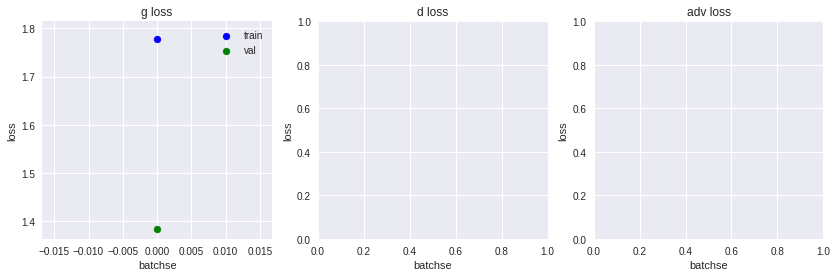

############################## verb 11 ##############################

##encoder_input[<num>]: 2 0 0 1 0
decoder TF     [<num>]: 1 1 1 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: 1 1 <end> eighty <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten

##encoder_input[<wrd>]: twenty thousand and ten
decoder TF     [<num>]: 4 6 <end> <end> <end> <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: twenty thousand <end> <end> <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder TF     [<num>]: 2 1 1 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 1
decoder TF     [<wrd>]: 1 1 <end> eighty <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder TF     [<num>]: 4 4 <e

500/500 [==============================] - 17s 35ms/step - loss: 0.8582 - val_loss: 1.2972


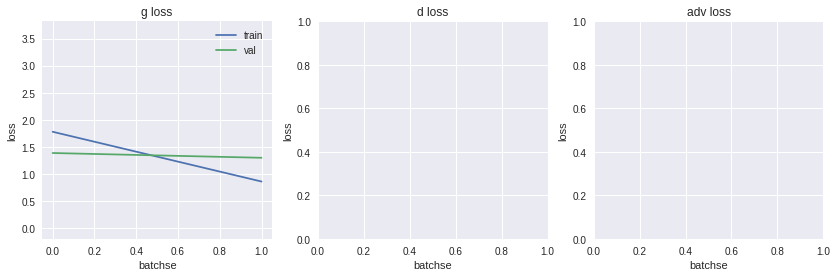

############################## verb 11 ##############################

##encoder_input[<num>]: 2 0 0 1 0
decoder TF     [<num>]: 2 0 0 0 0 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: 0 0 0 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten

##encoder_input[<wrd>]: twenty thousand and ten
decoder TF     [<num>]: 6 6 6 <end> <end> <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: twenty thousand and twenty <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder TF     [<num>]: 2 0 1 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 1
decoder TF     [<wrd>]: 1 1 0 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder TF     [<num>]: 6 6 6 <end> <end> <end> <end>

500/500 [==============================] - 17s 35ms/step - loss: 0.5131 - val_loss: 1.1276


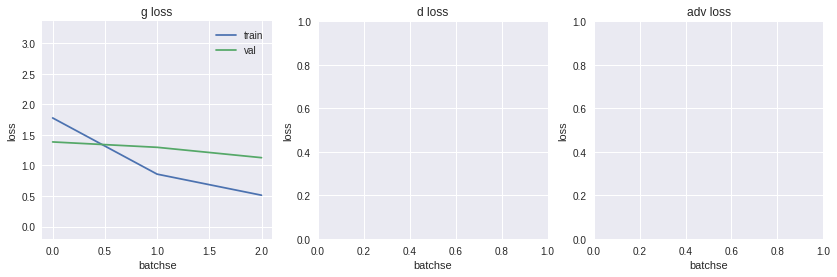

############################## verb 11 ##############################

##encoder_input[<num>]: 2 0 0 1 0
decoder TF     [<num>]: 2 0 0 1 0 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: 0 0 0 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten

##encoder_input[<wrd>]: twenty thousand and ten
decoder TF     [<num>]: 6 6 6 <end> <end> <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: twenty thousand and seventy <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder TF     [<num>]: 2 0 1 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 1
decoder TF     [<wrd>]: 1 0 0 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder TF     [<num>]: 6 6 6 <end> <end> <end> <end

500/500 [==============================] - 18s 36ms/step - loss: 0.3028 - val_loss: 0.9973


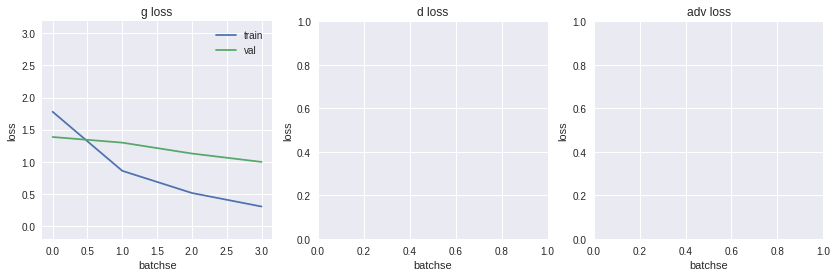

############################## verb 11 ##############################

##encoder_input[<num>]: 2 0 0 1 0
decoder TF     [<num>]: 2 0 0 0 0 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: forty 0 eight 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten

##encoder_input[<wrd>]: twenty thousand and ten
decoder TF     [<num>]: 6 6 6 <end> <end> <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: twenty thousand and ten <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder TF     [<num>]: 2 0 0 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 1
decoder TF     [<wrd>]: forty 0 eight 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder TF     [<num>]: 6 6 6 <end> <end

500/500 [==============================] - 18s 37ms/step - loss: 0.1928 - val_loss: 0.9379


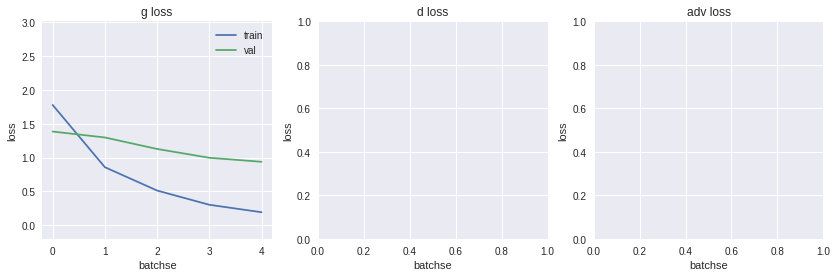

############################## verb 11 ##############################

##encoder_input[<num>]: 2 0 0 1 0
decoder TF     [<num>]: 2 0 0 1 0 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: forty 0 eight 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten

##encoder_input[<wrd>]: twenty thousand and ten
decoder TF     [<num>]: 6 6 6 <end> <end> <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: twenty thousand and ten <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder TF     [<num>]: 2 0 0 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 1
decoder TF     [<wrd>]: forty 0 eight 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder TF     [<num>]: 6 6 6 <end> <end

500/500 [==============================] - 18s 36ms/step - loss: 0.1298 - val_loss: 0.9232


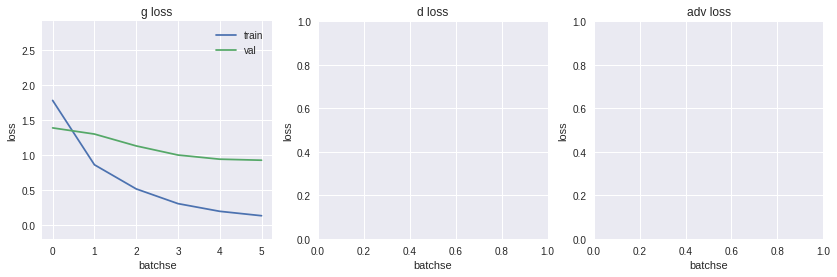

############################## verb 11 ##############################

##encoder_input[<num>]: 2 0 0 1 0
decoder TF     [<num>]: 2 0 0 1 0 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: forty 0 eight 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten

##encoder_input[<wrd>]: twenty thousand and ten
decoder TF     [<num>]: 6 6 6 <end> <end> <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: twenty thousand and ten <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder TF     [<num>]: 2 0 0 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 1
decoder TF     [<wrd>]: forty 1 eight 1 1 <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder TF     [<num>]: 6 6 6 <end> <end> <e

500/500 [==============================] - 19s 37ms/step - loss: 0.0958 - val_loss: 0.9543


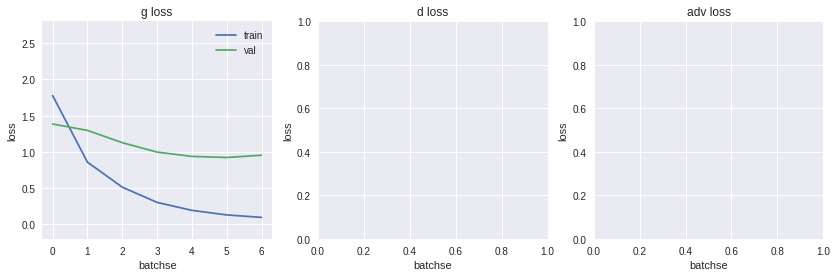

############################## verb 11 ##############################

##encoder_input[<num>]: 2 0 0 1 0
decoder TF     [<num>]: 2 0 0 1 0 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: forty 0 eight 0 <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten

##encoder_input[<wrd>]: twenty thousand and ten
decoder TF     [<num>]: 6 6 6 6 <end> <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 0
decoder TF     [<wrd>]: twenty thousand and ten <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and ten
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder TF     [<num>]: 2 0 0 1 1 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 1 1
decoder TF     [<wrd>]: forty 1 eight 1 1 <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder TF     [<num>]: 6 6 6 <end> <end> <end> 

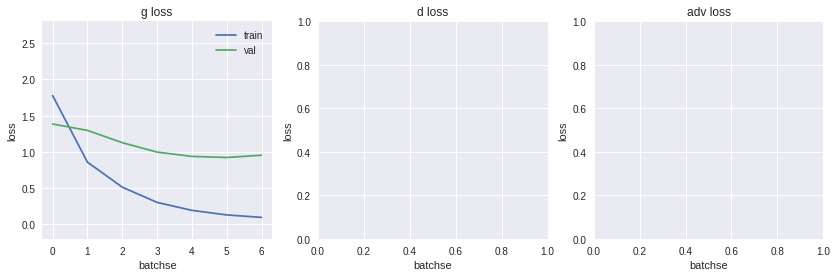

In [4]:
pre_train=True 
if (pre_train):
  for i in range(10):
    print ('EPOC',i)
    trainer.train_g(500,validation_steps=50,batch_size=64,noise_std=3)  #add noise

    l=trainer.loss_history.losses['loss'][-1:][0]
    if l<0.1: #0.5 is good value for 20 length sentences. for longer, NOT!
      print ('early break at break at',l,'epoc',i)
      break
    
  
  for i in range(0): #ZERO
    trainer.train_d(500,validation_steps=100,batch_size=64)
    l=trainer.loss_history_d.losses['loss'][-1:][0]
    if l<0.5:
      print ('early break at break at',l,'epoc',i)
      break
  trainer.plt_all()
  sampler.show_sample(dataset,'train',[11,12],teacher_forcing=True)

  

# Long adverserial training

epoc contains  2187 batches of 64
############################## epocs 0
0 of 100
Epoch 1/1
50/50 [==============================] - 1s 25ms/step - loss: 0.5767 - acc: 0.7013 - val_loss: 0.9426 - val_acc: 0.6250
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4575 - val_loss: 2.5796
########## end of cycle 0.3254918396472931 d 0.5767382466793061
Epoch 1/1
50/50 [==============================] - 2s 30ms/step - loss: 0.5280 - acc: 0.7328 - val_loss: 1.2920 - val_acc: 0.5625
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4396 - val_loss: 2.5809
########## end of cycle 0.4630725920200348 d 0.5280371224880218
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.5752 - acc: 0.6919 - val_loss: 1.9800 - val_acc: 0.5938
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4453 - val_loss: 2.3859
########## end of cycle 0.40855030417442323 d 0.5751785612106324
Epoch 1/1
50/50 [===========================

20/20 [==============================] - 33s 2s/step - loss: 0.4442 - val_loss: 2.3606
########## end of cycle 0.34388266801834105 d 0.6056221854686737
Epoch 1/1
50/50 [==============================] - 2s 31ms/step - loss: 0.5353 - acc: 0.7350 - val_loss: 1.1512 - val_acc: 0.6562
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4313 - val_loss: 2.3532
########## end of cycle 0.30899049043655397 d 0.5352631032466888
Epoch 1/1
50/50 [==============================] - 2s 30ms/step - loss: 0.5899 - acc: 0.6825 - val_loss: 1.0958 - val_acc: 0.7031
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4454 - val_loss: 2.5699
########## end of cycle 0.3608137547969818 d 0.5899412316083908
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6100 - acc: 0.6672 - val_loss: 1.5823 - val_acc: 0.6562
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4283 - val_loss: 2.4603
########## end of cycle 0.316252696514

50/50 [==============================] - 1s 30ms/step - loss: 0.5684 - acc: 0.7066 - val_loss: 2.3283 - val_acc: 0.3906
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4446 - val_loss: 2.6128
########## end of cycle 0.2987277150154114 d 0.5684196805953979
Epoch 1/1
50/50 [==============================] - 1s 28ms/step - loss: 0.5640 - acc: 0.7122 - val_loss: 1.9210 - val_acc: 0.4062
Epoch 1/1
20/20 [==============================] - 32s 2s/step - loss: 0.4251 - val_loss: 2.4304
########## end of cycle 0.32031851410865786 d 0.5640185856819153
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6128 - acc: 0.6634 - val_loss: 1.6728 - val_acc: 0.3438
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4225 - val_loss: 2.7033
########## end of cycle 0.34632056951522827 d 0.6128314173221588


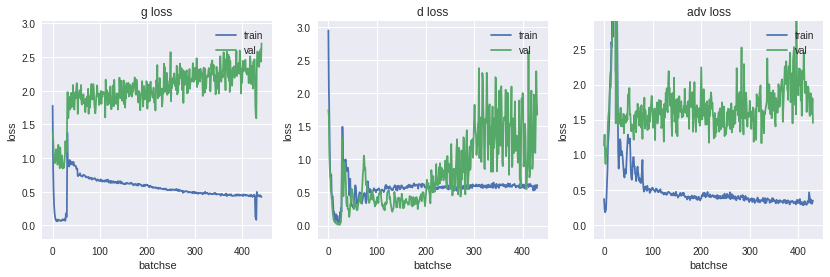

############################## epocs 1
0 of 100
Epoch 1/1
50/50 [==============================] - 2s 30ms/step - loss: 0.5807 - acc: 0.6897 - val_loss: 1.3763 - val_acc: 0.5781
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4363 - val_loss: 2.4444
########## end of cycle 0.31886553168296816 d 0.5806783258914947
Epoch 1/1
50/50 [==============================] - 2s 30ms/step - loss: 0.6280 - acc: 0.6441 - val_loss: 1.0986 - val_acc: 0.5938
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4461 - val_loss: 2.2606
########## end of cycle 0.3260114252567291 d 0.6279607343673707
Epoch 1/1
50/50 [==============================] - 2s 30ms/step - loss: 0.6023 - acc: 0.6834 - val_loss: 1.4481 - val_acc: 0.5000
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4390 - val_loss: 2.3892
########## end of cycle 0.33456299901008607 d 0.6023470413684845
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.610

20/20 [==============================] - 33s 2s/step - loss: 0.4491 - val_loss: 2.1931
########## end of cycle 0.2976874113082886 d 0.6107841634750366
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.5891 - acc: 0.6866 - val_loss: 0.7460 - val_acc: 0.7500
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4471 - val_loss: 2.2711
########## end of cycle 0.31057326793670653 d 0.5890692526102066
Epoch 1/1
50/50 [==============================] - 2s 30ms/step - loss: 0.6011 - acc: 0.6806 - val_loss: 0.8380 - val_acc: 0.5781
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4322 - val_loss: 2.4181
########## end of cycle 0.3100022256374359 d 0.6010524713993073
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6160 - acc: 0.6587 - val_loss: 0.6501 - val_acc: 0.6875
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4298 - val_loss: 2.2415
########## end of cycle 0.3388138353824

50/50 [==============================] - 1s 30ms/step - loss: 0.6067 - acc: 0.6741 - val_loss: 0.4654 - val_acc: 0.8906
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4257 - val_loss: 2.4464
########## end of cycle 0.3224839150905609 d 0.6066563189029693
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6242 - acc: 0.6425 - val_loss: 0.8390 - val_acc: 0.5938
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4419 - val_loss: 2.4904
########## end of cycle 0.3083872735500336 d 0.6241757762432099
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.5797 - acc: 0.6825 - val_loss: 1.3821 - val_acc: 0.5000
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4172 - val_loss: 2.3249
########## end of cycle 0.30908486247062683 d 0.5797399878501892


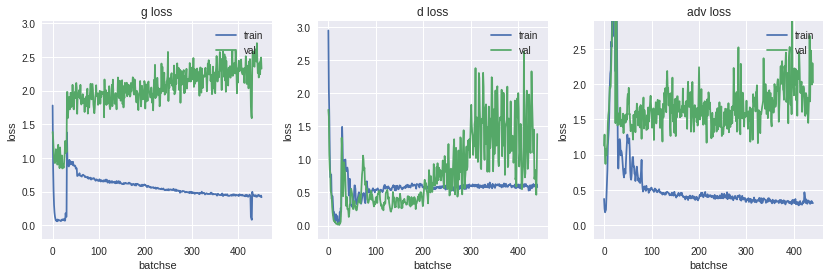

############################## epocs 2
0 of 100
Epoch 1/1
50/50 [==============================] - 1s 27ms/step - loss: 0.6309 - acc: 0.6616 - val_loss: 1.4826 - val_acc: 0.5781
Epoch 1/1
20/20 [==============================] - 32s 2s/step - loss: 0.4246 - val_loss: 2.3838
########## end of cycle 0.3439845860004425 d 0.6308996200561523
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.5751 - acc: 0.6869 - val_loss: 0.7960 - val_acc: 0.6719
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4195 - val_loss: 2.3817
########## end of cycle 0.3041594743728638 d 0.5751408165693284
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6167 - acc: 0.6688 - val_loss: 0.6847 - val_acc: 0.6719
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4269 - val_loss: 2.3692
########## end of cycle 0.31076369881629945 d 0.6166580486297607
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.6158

20/20 [==============================] - 33s 2s/step - loss: 0.4348 - val_loss: 2.2958
########## end of cycle 0.2819957256317139 d 0.6157516825199127
Epoch 1/1
50/50 [==============================] - 2s 31ms/step - loss: 0.5627 - acc: 0.7050 - val_loss: 0.7156 - val_acc: 0.7500
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4422 - val_loss: 2.3251
########## end of cycle 0.3061742424964905 d 0.5626725959777832
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6033 - acc: 0.6791 - val_loss: 0.7601 - val_acc: 0.6250
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4360 - val_loss: 2.3554
########## end of cycle 0.33643906116485595 d 0.60333469748497
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6066 - acc: 0.6713 - val_loss: 0.6644 - val_acc: 0.7812
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4188 - val_loss: 2.4811
########## end of cycle 0.323460382223129

50/50 [==============================] - 1s 30ms/step - loss: 0.5755 - acc: 0.7053 - val_loss: 0.8276 - val_acc: 0.6406
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4250 - val_loss: 2.2849
########## end of cycle 0.29534136652946474 d 0.5755498147010804
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.5821 - acc: 0.6919 - val_loss: 1.1763 - val_acc: 0.5469
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4234 - val_loss: 2.6686
########## end of cycle 0.3266319453716278 d 0.5821199351549149
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6213 - acc: 0.6509 - val_loss: 1.7643 - val_acc: 0.5469
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4333 - val_loss: 2.4623
########## end of cycle 0.3141573011875153 d 0.6212702167034149


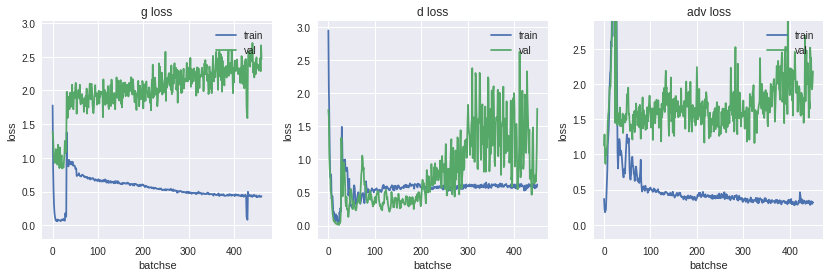

############################## epocs 3
0 of 100
Epoch 1/1
50/50 [==============================] - 2s 31ms/step - loss: 0.5970 - acc: 0.6844 - val_loss: 1.5772 - val_acc: 0.5156
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4271 - val_loss: 2.3121
########## end of cycle 0.28699703216552735 d 0.5969518518447876
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6044 - acc: 0.6800 - val_loss: 0.8570 - val_acc: 0.7188
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4331 - val_loss: 2.6296
########## end of cycle 0.3292496621608734 d 0.6044152152538299
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.5963 - acc: 0.6925 - val_loss: 0.5408 - val_acc: 0.7500
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4256 - val_loss: 2.4059
########## end of cycle 0.2888548344373703 d 0.5962689977884292
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.5979

20/20 [==============================] - 33s 2s/step - loss: 0.4324 - val_loss: 2.2325
########## end of cycle 0.3078714281320572 d 0.5979119729995728
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.5995 - acc: 0.6772 - val_loss: 0.9905 - val_acc: 0.5469
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4051 - val_loss: 2.6372
########## end of cycle 0.3023618280887604 d 0.5994696098566056
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.6002 - acc: 0.6816 - val_loss: 1.0717 - val_acc: 0.6875
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4267 - val_loss: 2.7955
########## end of cycle 0.2935324370861053 d 0.6002020251750946
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6195 - acc: 0.6637 - val_loss: 0.8797 - val_acc: 0.7188
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4306 - val_loss: 2.7942
########## end of cycle 0.31811307668685

50/50 [==============================] - 2s 30ms/step - loss: 0.5949 - acc: 0.6806 - val_loss: 0.5594 - val_acc: 0.7500
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4354 - val_loss: 2.1646
########## end of cycle 0.28765631914138795 d 0.5948520958423614
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.5672 - acc: 0.7013 - val_loss: 0.4349 - val_acc: 0.8125
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4393 - val_loss: 2.7723
########## end of cycle 0.2913013339042664 d 0.5671557575464249
Epoch 1/1
50/50 [==============================] - 1s 30ms/step - loss: 0.6255 - acc: 0.6416 - val_loss: 1.0407 - val_acc: 0.6094
Epoch 1/1
20/20 [==============================] - 34s 2s/step - loss: 0.4300 - val_loss: 2.2941
########## end of cycle 0.3584327161312103 d 0.6254686349630356


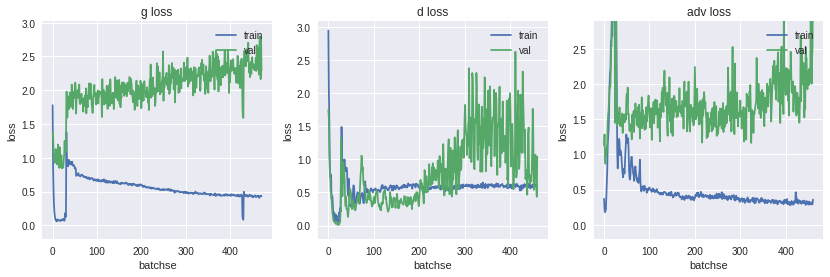

############################## epocs 4
0 of 100
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.5475 - acc: 0.7234 - val_loss: 2.6710 - val_acc: 0.5156
Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4268 - val_loss: 2.1796
########## end of cycle 0.27919644117355347 d 0.5474663543701171
Epoch 1/1
50/50 [==============================] - 1s 29ms/step - loss: 0.6284 - acc: 0.6531 - val_loss: 1.2134 - val_acc: 0.5625
Epoch 1/1
17/20 [========================>.....] - ETA: 4s - loss: 0.4269

KeyboardInterrupt: ignored

In [34]:
print ('epoc contains ',epoc,'batches of', batch_size)
# 4 epocs of 1/10.  started well, then adv. start to be too-strong
# then 1/100
small_steps_d=50
small_steps_adv=5
small_steps_cycle=20

for e in range(50):
  print ('#'*30,'epocs',e)
  
  for i in range(10):#range(int(epoc/small_steps_adv)):
    #if i % 20 ==0:print (i,'of',int(epoc/small_steps_adv),'small steps of size',small_steps_adv,'please wait... ')
    if i % 20 ==0:print (i,'of',100)
    #print ('eval_d_g',trainer.eval_d_g(10),'eval_d',trainer.eval_d(10))
     
    steps = small_steps_adv
    trainer.train_d_g(steps ,batch_size=64,noise=0.02,noise_std=3)
    '''tries=0
    while trainer.loss_history_adv.losses['loss'][-1:][0]>0.05 and tries<10:
      print ('adv d_g loss',trainer.loss_history_adv.losses['loss'][-1:][0])
      steps = min(steps*2,20)
      tries+=1
      trainer.train_d_g(steps,batch_size=64,noise=0.02)
    print ('eval_d_g',trainer.eval_d_g(10),'eval_d',trainer.eval_d(10))
    sampler.show_sample(dataset,'train'  ,sample_ids=[0,30,60],teacher_forcing=True)
    '''    
    steps = small_steps_d
    tries=0
    trainer.train_d(steps,batch_size=64,noise=0.02)
    '''while trainer.loss_history_d.losses['loss'][-1:][0]>0.05 and tries<10:
      print ('d loss',trainer.loss_history_d.losses['loss'][-1:][0])
      steps = min(steps*2,10)
      tries+=1
      trainer.train_d(small_steps_d,batch_size=64,noise=0.02)
    '''    
    steps = small_steps_cycle
    trainer.train_g_cycle(small_steps_cycle,batch_size=64,noise_std=1)
    print ('#'*10, 'end of cycle',trainer.loss_history_adv.losses['loss'][-1:][0],'d',trainer.loss_history_d.losses['loss'][-1:][0])
    #print (trainer.eval_d_g(50),trainer.eval_d(50))
  
  trainer.plt_all()
  
  #if e%10==9:
  #   Persistency().save_weights(model.get_models(),model.get_model_names(),save_to_gdrive=True)
print ('done')



In [33]:
for i in range(10):
  trainer.train_g_cycle(20,batch_size=64,noise_std=1)
trainer.plt_all()

Epoch 1/1
20/20 [==============================] - 33s 2s/step - loss: 0.4969 - val_loss: 2.3830
Epoch 1/1
 8/20 [===========>..................] - ETA: 16s - loss: 0.4558

KeyboardInterrupt: ignored

In [31]:
trainer.train_g(100,batch_size=64,noise_std=1)

Epoch 1/1
100/100 [==============================] - 4s 44ms/step - loss: 0.0816 - val_loss: 1.5897


# Error analysis

In [35]:
sampler.show_sample(dataset,'train'  ,sample_ids=[10],teacher_forcing=True)   #,8000+0
sampler.show_sample(dataset,'train'  ,sample_ids=[12],teacher_forcing=False)   #,8000+0


############################## verb 10 ##############################

##encoder_input[<num>]: 2 0 0 0 9
decoder TF     [<num>]: 2 0 0 9 9 <end> <end> <end> <end>
gold label     [<num>]: 2 0 0 0 9
decoder TF     [<wrd>]: fifty five five five <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and nine

##encoder_input[<wrd>]: twenty thousand and nine
decoder TF     [<num>]: 8 8 3 4 4 4 <end> <end> <end>
gold label     [<num>]: 2 0 0 0 9
decoder TF     [<wrd>]: twenty thousand and thirty <end> <end> <end> <end> <end>
gold label     [<wrd>]: twenty thousand and nine
############################## verb 12 ##############################

##encoder_input[<num>]: 2 0 0 1 1
decoder sample [<num>]: 2 0 0 1 1 <end>
gold label     [<num>]: 2 0 0 1 1
decoder sample [<wrd>]: fifty five thousand seven hundred and ninety five <end>
gold label     [<wrd>]: twenty thousand and eleven

##encoder_input[<wrd>]: twenty thousand and eleven
decoder sample [<num>]: 8 9 8 6 0 <end>
gold labe

In [34]:
t

NameError: ignored

In [119]:

#a= model.predict([x_train[s:e], x_train_d[s:e]])
#for i in range(dataset.MAX_SEQUENCE_LENGTH):
#  best=np.argmax(a[0,i])
#  print (i,best,dataset.index2word[best],a[0,i,best],a[0,i,0])

#NEED TO FIX CODE HERE
from keras.losses import categorical_crossentropy
p=model.predict([x_val,x_val_d])
scores=K.eval(K.sum(categorical_crossentropy(K.constant(p), K.constant(y_val) ),axis=1))
worse_10 = scores.argsort()[::-1][:10]

for i in range(len(worse_10)):
  bad=worse_10[i]
  print (i,'arg',bad,'score',scores[bad],show_sample('val',False,bad))
  


Epoch 1/1
100/100 [==============================] - 4s 41ms/step - loss: 0.0621 - dcd_sfmax_loss: 3.8486e-05 - styl_clsf_loss: 0.0621 - val_loss: 0.7281 - val_dcd_sfmax_loss: 0.6660 - val_styl_clsf_loss: 0.0620


AttributeError: ignored

In [167]:
#trainer.train_g(100)


(64, 512) -0.0025372969
(64, 512) -0.0014705304


## Error of style disc.

In [251]:

model = D_G_Model(num_encoder_tokens=len(dataset.word2index),
                    num_decoder_tokens=len(dataset.word2index),  #from dataset 3628
                    style_out_size=len(dataset.style2index), #from dataset 2
                    cuddlstm=True,
                    latent_dim = 256, #twice the default. make it stronger! but slower
                    bidi_encoder = True,
                    adv_loss_weight=1.0,)
model.build_all()
from models import D_G_Trainer
trainer = D_G_Trainer(model,dataset)

### ASSERT ENCODER DOES NOT CHANGE
[x1,x2],[y1,y2] = next(dataset.gen_adv(dataset.train, batch_size))
e = model.encoder_model.predict(x1)[0]
trainer.train_d(1) #copy-encoder
d_e = model.d_encoder_model.predict(x1)[0]
assert d_e.mean() == e.mean()
trainer.train_d_g(1) #copy-encoder
e = model.encoder_model.predict(x1)[0]  #update encoder
assert d_e.mean()!= e.mean()



print (e[0].shape,e[0].mean())  #-0.024111088 unchanged
print ('y2=',y2[:5,0].T)
p = model.d.predict(x1)
print ('d',p[:5,0].T)
model.classifier_head.set_weights(model.d_classifier_head.get_weights())
[p1,p2]= model.g_d.predict([x1,x2])
print ('expect g_d to be not-so-good :', p2[:5,0].T)
trainer.train_d_g(100)
print ('expect g_d to be better :', p2[:5,0].T)

#print ('g_d total,sofmax,cls',model.g_d.evaluate([x1,x2],[y1,y2]))
#print ('d ',model.d.evaluate(x1,y2))


(512,) 3.3750228e-05
y2= [0 1 0 1 0]
d [0.5026854  0.5075925  0.50279593 0.5066933  0.5000022 ]
expect g_d to be not-so-good : [0.5079097  0.51196444 0.5066408  0.5104728  0.50286734]
Epoch 1/1
100/100 [==============================] - 5s 48ms/step - loss: 2.0476 - dcd_sfmax_loss: 1.8878 - styl_clsf_loss: 0.1598 - val_loss: 1.8974 - val_dcd_sfmax_loss: 1.8354 - val_styl_clsf_loss: 0.0620
expect g_d to be better : [0.5079097  0.51196444 0.5066408  0.5104728  0.50286734]


In [277]:

#model.classifier_head.set_weights(model.d_classifier_head.get_weights())
def eval_d(model, steps):
      model.d_encoder_model.set_weights(model.encoder_model.get_weights())
      return model.d.evaluate_generator(dataset.gen_d(dataset.train, batch_size),
                                 steps,
                                       )
def eval_d_g(model,steps,):
        model.classifier_head.set_weights(model.d_classifier_head.get_weights())

        return model.g_d.evaluate_generator(dataset.gen_adv(dataset.train, batch_size),
                                     steps)    

print (eval_d(trainer.model, 50))
print (eval_d_g(trainer.model,50))





[1.1920930376163597e-07, 1.0]
[9988.1268359375, 0.033075234964489934, 9988.09375]


In [250]:
print (eval_d(model, 50))
print (eval_d_g(model,50))
trainer = D_G_Trainer(model,dataset)
trainer.train_d_g(500)

[x1,x2],[y1,y2] = next(dataset.gen_adv(dataset.train, batch_size))
e1 = model.encoder_model.predict(x1)[0]
trainer.train_d_g(1) #copy-encoder
e2 = model.encoder_model.predict(x1)[0]  #update encoder
assert d_e.mean()!= e.mean()


[1.1920930376163597e-07, 1.0]
[9988.096796875, 0.0031033105170354246, 9988.09375]
Epoch 1/1
500/500 [==============================] - 20s 40ms/step - loss: 9988.0974 - dcd_sfmax_loss: 0.0037 - styl_clsf_loss: 9988.0938 - val_loss: 9988.7266 - val_dcd_sfmax_loss: 0.6332 - val_styl_clsf_loss: 9988.0938


In [238]:



def show_model(m,indent=0):
  for layer in m.layers:
    if type(layer)==Model:
      print (' '*indent,'model',layer)
      show_model(layer,indent=3)
    elif type(layer)==Bidirectional :
      print(' '*indent,layer)
      lstm=layer.layer 
      print(' '*indent*2,lstm,lstm.weights)
    else:
      print(' '*indent,layer)

show_model(model.d)
      
      
#for l in model.d.layers[2].layers: #classifier layer
  #[4],l[6],l[4].mean(),l[6].mean())
  #if type(l)==Dense:
   # print ('dense',K.eval(l.weights[0]).mean())
    
    
#for l in model.d.layers[1].layers: #classifier layer
#  print(l)
#  if type(l)==Dense:
#    print ('dense',K.eval(l.weights[0]).mean())    
#print (eval_d(model,10))
#trainer.train_d_g(100)
#print (eval_d(model,10))



 model <keras.engine.training.Model object at 0x7fc551cebeb8>
       <keras.layers.cudnn_recurrent.CuDNNLSTM object at 0x7fc551ff2668> []
 model <keras.engine.training.Model object at 0x7fc551a4f128>


In [0]:
why GANs work?
d classifies fake and real.
g is working to make fakes look more real.

# FAQ and wierd exceptions

* If you get exceptions related to cuda-lstm , inside the show_sample, but you actially not using it at all.  You will need to restart the notebook (thinking it's TF issue/bug)
* why the sampler without teacher-forcing emits garabage? if it emits the 1st word differently from teacher-forcing, it means that the models somehow got disconnected, or that you use wrong label (y1 should be one-hot of x1 not of x2)
* why the decoder shows bad sentences when my loss gets lower?  the loss should be **very** low before you start getting real results. typically values of g of less than 0.5
* why unkown-style sentences always generate the same sentence? probably "mode collapse" encountred during adverserial-training

In [0]:
# Very slow training speed, is it generator next() which is slow?
%time gen= dataset.gen_adv(dataset.train, batch_size)
%time next(gen)
%time next(gen)
%time next(gen)
[x1,x2],[y1,y2]=next(gen)
print (x1.shape)  #20 batches per second

#for i in range(100): #batch-generation time is up to 50ms. means 10 batches is 0.5 seconds, means train step is 1sec only generation!
train_adv(model.g_d, 1000, validation_steps=1) #looked like 2-3min 180s, of which 100s are 

In [289]:
from models import D_G_Trainer
D_G_Trainer(model,dataset).eval_d(1)

AttributeError: ignored